In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [ ]:
https://drive.google.com/file/d/12fjVcxssDM1ReQUUeVAcByr62So6ff8O/view?usp=sharing

In [2]:
import io
data = pd.read_csv(r'datasets/AAPL.csv')

In [3]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2011-08-01,14.206429,14.267857,14.013214,14.169643,12.098496,612836000
1,2011-08-02,14.201786,14.210714,13.869643,13.889643,11.859419,639539600
2,2011-08-03,13.963571,14.055357,13.651429,14.020357,11.971028,732508000
3,2011-08-04,13.907500,13.975714,13.476786,13.477500,11.507519,871407600
4,2011-08-05,13.587143,13.696429,12.948929,13.343571,11.393167,1204590800


In [4]:
data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
2763,2022-07-25,154.009995,155.039993,152.279999,152.949997,152.737839,53623900
2764,2022-07-26,152.259995,153.089996,150.800003,151.600006,151.389725,55138700
2765,2022-07-27,152.580002,157.330002,152.160004,156.789993,156.572510,78620700
2766,2022-07-28,156.979996,157.639999,154.410004,157.350006,157.131744,81378700
2767,2022-07-29,161.240005,163.630005,159.500000,162.509995,162.284576,101786900


In [5]:
data_training = data[data['Date']<'2022-07-01'].copy()

In [6]:
data_training.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2011-08-01,14.206429,14.267857,14.013214,14.169643,12.098496,612836000
1,2011-08-02,14.201786,14.210714,13.869643,13.889643,11.859419,639539600
2,2011-08-03,13.963571,14.055357,13.651429,14.020357,11.971028,732508000
3,2011-08-04,13.907500,13.975714,13.476786,13.477500,11.507519,871407600
4,2011-08-05,13.587143,13.696429,12.948929,13.343571,11.393167,1204590800


In [7]:
data_test = data[data['Date']>='2022-07-01'].copy()

In [8]:
data_test.head()

,Date,Open,High,Low,Close,Adj Close,Volume
2748,2022-07-01,136.039993,139.039993,135.660004,138.929993,138.737274,71051600
2749,2022-07-05,137.770004,141.610001,136.929993,141.559998,141.363632,73353800
2750,2022-07-06,141.350006,144.119995,141.080002,142.919998,142.721756,74064300
2751,2022-07-07,143.289993,146.550003,143.279999,146.350006,146.147003,66253700
2752,2022-07-08,145.259995,147.550003,145.000000,147.039993,146.836029,64547800


In [9]:
training_data = data_training.drop(['Date', 'Adj Close'], axis=1)
training_data.head()

,Open,High,Low,Close,Volume
0,14.206429,14.267857,14.013214,14.169643,612836000
1,14.201786,14.210714,13.869643,13.889643,639539600
2,13.963571,14.055357,13.651429,14.020357,732508000
3,13.907500,13.975714,13.476786,13.477500,871407600
4,13.587143,13.696429,12.948929,13.343571,1204590800


In [10]:
scaler = MinMaxScaler()
training_data = scaler.fit_transform(training_data)
training_data

array([[0.00788499, 0.00727702, 0.00843997, 0.00917971, 0.39029977],
       [0.00785764, 0.0069407 , 0.00757774, 0.00752677, 0.40852599],
       [0.00645441, 0.00602635, 0.00626724, 0.00829842, 0.47198045],
       ...,
       [0.76143092, 0.7674043 , 0.74896732, 0.73688775, 0.01780291],
       [0.73392185, 0.75121912, 0.74506365, 0.74745471, 0.0172289 ],
       [0.73268479, 0.73768241, 0.72764754, 0.73263733, 0.03956297]])

In [11]:
X_train = []
y_train = []

In [12]:
training_data.shape[0]

2748

In [13]:
for i in range(60, training_data.shape[0]):
    X_train.append(training_data[i-60:i])
    y_train.append(training_data[i, 0])

In [14]:
X_train, y_train = np.array(X_train), np.array(y_train)

In [15]:
X_train.shape, y_train.shape

((2688, 60, 5), (2688,))

In [16]:
X_old_shape = X_train.shape
X_train = X_train.reshape(X_old_shape[0], \
                          X_old_shape[1]*X_old_shape[2]) 
X_train.shape

(2688, 300)

In [17]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Input, Dense, Dropout

In [18]:
regressor_ann = Sequential()

In [19]:
regressor_ann.add(Input(shape = (300,)))

In [20]:
regressor_ann.add(Dense(units = 512, activation = 'relu'))
regressor_ann.add(Dropout(0.2))

In [21]:
regressor_ann.add(Dense(units = 128, activation = 'relu'))
regressor_ann.add(Dropout(0.3))

In [22]:
regressor_ann.add(Dense(units = 64, activation = 'relu'))
regressor_ann.add(Dropout(0.4))

In [23]:
regressor_ann.add(Dense(units = 16, activation = 'relu'))
regressor_ann.add(Dropout(0.5))

In [24]:
regressor_ann.add(Dense(units = 1))

In [25]:
regressor_ann.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               154112    
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               65664     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 16)                1

In [26]:
regressor_ann.compile(optimizer='adam', \
                      loss = 'mean_squared_error')

In [27]:
regressor_ann.fit(X_train, y_train, epochs=10, batch_size=32)

Epoch 1/10
84/84 [==============================] - 3s 3ms/step - loss: 0.0781
Epoch 2/10
84/84 [==============================] - 0s 2ms/step - loss: 0.0353
Epoch 3/10
84/84 [==============================] - 0s 2ms/step - loss: 0.0256
Epoch 4/10
84/84 [==============================] - 0s 2ms/step - loss: 0.0251
Epoch 5/10
84/84 [==============================] - 0s 2ms/step - loss: 0.0241
Epoch 6/10
84/84 [==============================] - 0s 2ms/step - loss: 0.0217
Epoch 7/10
84/84 [==============================] - 0s 2ms/step - loss: 0.0205
Epoch 8/10
84/84 [==============================] - 0s 1ms/step - loss: 0.0194
Epoch 9/10
84/84 [==============================] - 0s 1ms/step - loss: 0.0182
Epoch 10/10
84/84 [==============================] - 0s 2ms/step - loss: 0.0175


In [28]:
data_test.head()

,Date,Open,High,Low,Close,Adj Close,Volume
2748,2022-07-01,136.039993,139.039993,135.660004,138.929993,138.737274,71051600
2749,2022-07-05,137.770004,141.610001,136.929993,141.559998,141.363632,73353800
2750,2022-07-06,141.350006,144.119995,141.080002,142.919998,142.721756,74064300
2751,2022-07-07,143.289993,146.550003,143.279999,146.350006,146.147003,66253700
2752,2022-07-08,145.259995,147.550003,145.000000,147.039993,146.836029,64547800


In [29]:
past_60_days = data_training.tail(60)
df = past_60_days.append(data_test, ignore_index = True)

In [30]:
df = df.drop(['Date', 'Adj Close'], axis = 1)
inputs = scaler.transform(df) 
X_test = []
y_test = []
for i in range(60, inputs.shape[0]):
    X_test.append(inputs[i-60:i])
    y_test.append(inputs[i, 0])
X_test, y_test = np.array(X_test), np.array(y_test)
X_old_shape = X_test.shape
X_test = X_test.reshape(X_old_shape[0], \
                        X_old_shape[1] * X_old_shape[2])
X_test.shape, y_test.shape

((20, 300), (20,))

In [31]:
y_pred = regressor_ann.predict(X_test)

In [32]:
scaler.scale_

array([5.89059465e-03, 5.88551821e-03, 6.00556819e-03, 5.90334970e-03,
       6.82537949e-10])

In [33]:
scale = 1/3.70274364e-03
scale 

270.0700067909643

In [34]:
y_pred = y_pred*scale
y_test = y_test*scale

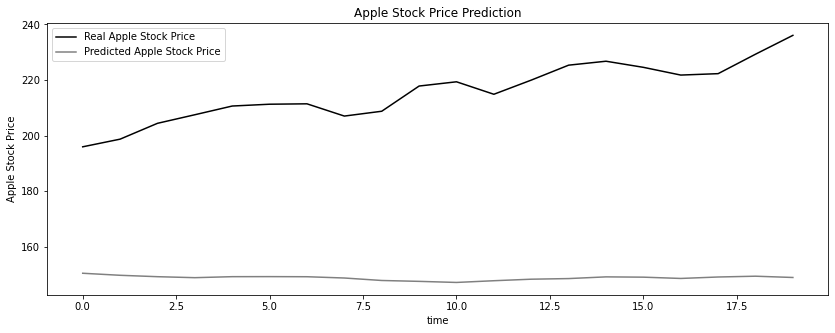

In [35]:
plt.figure(figsize=(14,5))
plt.plot(y_test, color = 'black', label = "Real Apple Stock Price")
plt.plot(y_pred, color = 'gray',\
         label = 'Predicted Apple Stock Price')
plt.title('Apple Stock Price Prediction')
plt.xlabel('time')
plt.ylabel('Apple Stock Price')
plt.legend()
plt.show()